## Import dependencies

In [299]:
from src.integration import *
from src.model import *
from src.bifurcation import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Hopf Bifurcation

In [300]:
t_0 = 0
t_end = 200

beta=11.5
A=20
d=0.1
nu=1
b=0.022
mu0 = 10      
mu1 = 10.45
y0 = [195.3, 0.052, 4.4]

t = np.linspace(t_0, t_end, 3000)

model = SIR(t_0, t_end, beta, A, d, nu, b, mu0, mu1)

X, infodict = integrate.odeint(model.integration_model, y0, t, full_output=True)

In [301]:
#for i in X:
#    new_X.append([i[0],i[1]])

In [302]:
# x,y = np.array(new_X).T

In [303]:
#S, I = np.linspace(2,2, 100), np.linspace(2,2, 100)
w = 3
I, S = np.mgrid[-w:w:100j, -w:w:100j]
i,s = I[:,0], S[0,:]

# Andronov_Hopf normal form   
dSdt = A - d * S - (beta * S * I) / (S + I + R)
dIdt = - (d + nu) * I - m * I + (beta * S * I) / (S + I + R)

Text(0.5, 1.0, 'Hopf Bifurcation')

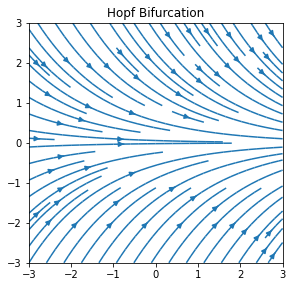

In [305]:
fig = plt.figure(figsize=(10, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(s, i, dSdt, dIdt, density=[1])
ax0.set_title('Hopf Bifurcation')

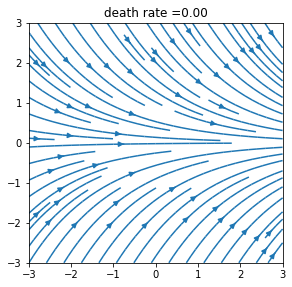

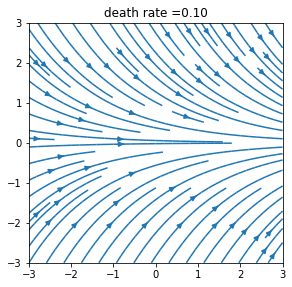

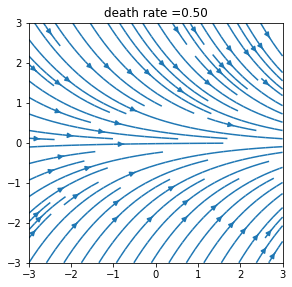

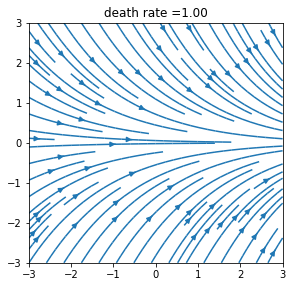

In [309]:
#S, I = np.linspace(2,2, 100), np.linspace(2,2, 100)
w = 3
I, S = np.mgrid[-w:w:100j, -w:w:100j]

for d in [0, 0.1, 0.5, 1]:
    dSdt = A - d * S - (beta * S * I) / (S + I + R)
    dIdt = - (d + nu) * I - m * I + (beta * S * I) / (S + I + R)
    
    fig = plt.figure(figsize=(10, 20))
    gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

    #  Varying density along a streamline
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(s, i, dSdt, dIdt, density=[1])
    ax0.set_title("death rate =" + f"{d:.2f}")

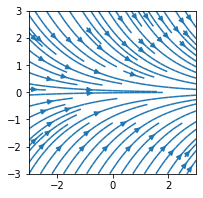

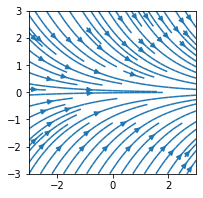

In [292]:
plt.figure(figsize=(3, 3))
# gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
# ax0 = fig.add_subplot(gs[0, 0])
plt.streamplot(s, i, dSdt, dIdt, density=[1])
# ax0.streamplot(S, I, dSdt, dIdt, color='red', density=[0.5, 1])
# ax0.set_title('Hopf Bifurcation')
plt.show(False)

## Hopf Bifurcation for SIR

    """
    SIR model including hospitalization and natural death.

    Parameters:
    -----------
    mu0
        Minimum recovery rate
    mu1
        Maximum recovery rate
    beta
        average number of adequate contacts per unit time with infectious individuals
    A
        recruitment rate of susceptibles (e.g. birth rate)
    d
        natural death rate
    nu
        disease induced death rate
    b
        hospital beds per 10,000 persons
    """